#Metal skupine v prostoru in času
##Projektna naloga pri predmetu Programiranje 1
##Vir podatkov: 
[Encyclopaedia Metallum](http://www.metal-archives.com/), najbolj obsežen poskus arhiviranja podatkov o skupinah z vsaj enim izdanim albumom
## Zajeti podatki: 
* imena skupin;
* leto ter država njihovega nastanka;
* podzvrst metala, ki jo izvajajo;
* njihov status (*Active/On hold/Split-up/Unknown/Changed name/Disputed*)

Opomba: zaradi prevelike količine strani sem se omejila na 125 278 možnih ID-jev (vsaka skupina ima svoj ID, a niso vsi v uporabi). Podatke sem tako zbrala za skoraj 60 000 skupin, od teh je 16 dodanih "na roke".

## Predvidena analiza:
* kdaj število novih skupin na leto doseže maksimum;
* v kateri državi je največ aktivnih skupin;
* kateri žanri so najbolj zastopani ter kdaj so bili najbolj popularni;
* katera podzvrst je pritegnila največ propadlih skupin.

In [86]:
# priprava datoteke in uvoz podatkov za obdelavo
%matplotlib inline
import pandas as pd
pd.options.display.max_rows=25
skupine = pd.read_csv('csv/metal_skupine_id.csv')
statusi = pd.read_csv('csv/statusi.csv')
pos_zvrsti_id = pd.read_csv('csv/zvrsti.csv')
pos_leta = pd.read_csv('csv/leta.csv')
#pos_zvrsti.sum()[pos_zvrsti.sum()>250].plot(kind='bar', figsize=(20, 10))
#pos_zvrsti.sum().sort_values()

1. Katerega leta je nastalo največ novih skupin?

Tu predstavljeni podatki glede novonastalih skupin na leto žal niso najbolj natančni, saj je izpuščenih podatkov preveč.
Realno je največ skupin nastalo leta 2005, in sicer kar 5726. Kakorkoli, če spregledamo leta od 2006 dalje, so podatki precej uporabni.

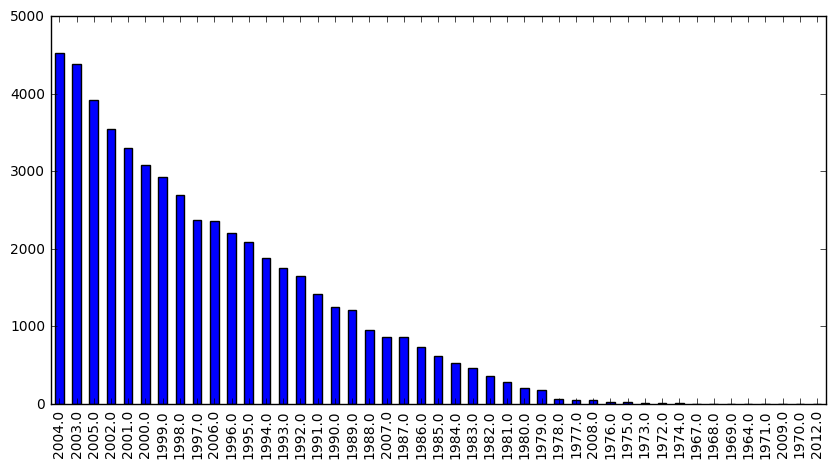

In [84]:
skupine_leto = skupine['leto'].value_counts()
#vec_kot_100 = skupine_leto > 100
#skupine[vec_kot_100]
skupine_leto.plot(kind='bar', figsize=(10, 5), sort_columns=True)

Kako pa se je popularnost zvrsti spreminjala do leta 2006? Za pridobitev tega podatka je najprej treba združiti tabeli z letnicami in zvrstmi. Skupine, ki so nastale po letu 2006 (2007?), bom izpustila.

In [109]:
leto_zvrst = pos_leta.merge(pos_zvrsti_id)
cisto_leto_zvrst = leto_zvrst[leto_zvrst['leto'] < 2007]
cisto_leto_zvrst
vsote_leta = cisto_leto_zvrst.groupby('leto').aggregate(sum)
vsote_po_letih = vsote_leta[vsote_leta.columns.difference(['id'])]
vsote_po_letih

,A Cappella,AOR,Absence,Acoustic,Adult,Age,Alternative,Ambient,Art,Art Rock,...,Thrashcore,Trance,Tribal,Trip,Urban,Various,Viking,Wall,Wave,World
leto,,,,,,,,,,,,,,,,,,,,,
1964.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1967.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1969.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1971.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1972.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1973.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1974.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Katere izmed mnogih zvrsti so sploh bistvene? Recimo, da je zvrst zanemarljiva, če je le-tej pripadajočih skupin manj kot sto.

In [107]:
vsote_zvrsti = pos_zvrsti.sum()
glavne_zvrsti = vsote_zvrsti[vsote_zvrsti >= 100]
glavne_zvrsti.sort_values()
zvrsti = glavne_zvrsti.to_frame()
nazivi_zvrsti = zvrsti[zvrsti.columns.difference([0])]
nazivi_zvrsti

""
Alternative
Ambient
Atmospheric
Black
Blackened
Brutal
Crossover
Dark
Death
Deathcore


Zdaj združimo omejeno časovno obdobje z omejenim spektrom zvrsti. (ni še uspelo)

In [108]:
nazivi_zvrsti.merge(vsote_po_letih)

MergeError: No common columns to perform merge on

,status,pomen
0,1,Active
1,2,On hold
2,3,Split-up
3,4,Unknown
4,5,Changed name
5,6,Disputed


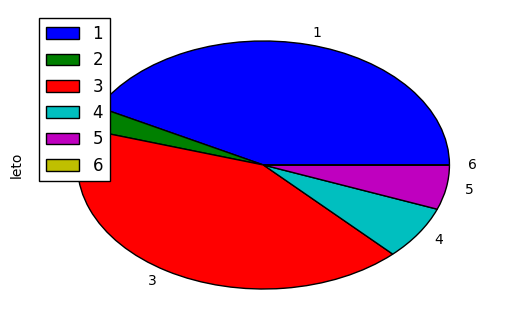

In [92]:
po_statusu = skupine.groupby('status').sum()
po_statusu.plot(subplots=True, kind='pie')
statusi
#propadajoca_zvrst = po_statusu.sum().sort_values('po_statusu', ascending=False)

In [42]:
aktivni = skupine[skupine['status'] == 1]
cakajoci = skupine[skupine['status'] == 2]
propadli = skupine[(skupine['status'] == 3) | (skupine['status'] == 6)]
neznano = skupine[skupine['status'] == 4]
preimenovani = skupine[skupine['status'] == 5]
skregani = skupine[skupine['status'] == 6]
propadli.groupby('zvrst').aggregate(sum)

,leto,status
zvrst,,
"AOR,Hard,Power,Progressive,Rock",1997.0,3
"Acoustic,Black",2007.0,3
"Acoustic,Black,Folk",1996.0,3
Alternative,1991.0,3
"Alternative,Death,Deathcore,Rock",1994.0,3
"Alternative,Death,Experimental",1999.0,3
"Alternative,Death,Gothic",2001.0,3
"Alternative,Doom,Gothic,Rock",2000.0,3
"Alternative,Gothic,Progressive",1993.0,3
